<a href="https://colab.research.google.com/github/isaac-munuhe/TMD-Sales-Analysis/blob/main/TMD_2022_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Pandas Libarary, and Loading the Excel File into the Pandas DataFrame

In [ ]:
import pandas as pd

# Load the Excel file
data = pd.read_excel('/content/Practical Interview.xlsx')



**Exploring the data**

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Display the summary of the dataframe
print(data.info())


   Chassis No Engine No         Model    Branch Invoice Date        Retail  \
0        2555  22/05385  FRR 90 TRUCK     THIKA   2022-01-31  1.293103e+06   
1      155432  11/03369  FRR 90 TRUCK  KARATINA   2022-01-31  1.415948e+06   
2      194141  17/01738  FRR 90 TRUCK     THIKA   2022-01-31  1.299828e+06   
3      204380  15/02785  FRR 90 TRUCK     THIKA   2022-01-31  1.293103e+06   
4      322055  20/05312  FRR 90 TRUCK     THIKA   2022-01-31  1.307328e+06   

         W/Sale Customer Name  
0  1.213526e+06       ROSMBIU  
1  1.213526e+06       FLOMBUA  
2  1.213526e+06       ROBANGU  
3  1.213526e+06       SMA LTD  
4  1.213526e+06       BERAMAU  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Chassis No     647 non-null    int64         
 1   Engine No      647 non-null    object        
 2   Model          647 non-nul

**Data cleaning**
Handling any missing values and ensuring correct data type

In [ ]:
# Check for missing values
print(data.isnull().sum())

#  Fill missing values
data['Branch'].fillna('Unknown', inplace=True)
data['Customer Name'].fillna('Unknown', inplace=True)

# Ensure 'Invoice Date' is a datetime type
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])


Chassis No       0
Engine No        0
Model            0
Branch           1
Invoice Date     0
Retail           0
W/Sale           0
Customer Name    1
dtype: int64


I notice there anomilies on the branches names, hence had replace some names,and mapping of the branches.


In [ ]:
# Replace 'THUIKA' with 'THIKA'
data['Branch'] = data['Branch'].replace('THUIKA', 'THIKA')

# Verify the correction
print(data['Branch'].unique())


['THIKA' 'KARATINA' 'RUAKA' 'ATHI' 'MACHAKOS' 'ATHIRIVER' 'KITUI'
 'RUAKA/MACHA' 'ATHI RIVER' 'THIKA ' 'ATHI ' 'ATHI RIVVER ' 'Unknown']


In [ ]:
branch_mapping = {
    'ATHI': 'ATHIRIVER',
    'ATHI RIVER': 'ATHIRIVER',
    'ATHI RIVVER ': 'ATHIRIVER',
    'THIKA ': 'THIKA',
    'RUAKA/MACHA': 'RUAKA',  # Assuming that RUAKA/MACHA should be mapped to RUAKA
    'RUAKA-MACHA': 'RUAKA',  # Assuming that RUAKA-MACHA should also be mapped to RUAKA
    'Unknown': 'UNKNOWN'  # Keeping 'Unknown' as a separate category if needed
}



In [ ]:
# Apply the mapping to the 'Branch' column
data['Branch'] = data['Branch'].str.strip().replace(branch_mapping)

# Verify the changes
print(sorted(data['Branch'].unique()))

['ATHI RIVVER', 'ATHIRIVER', 'KARATINA', 'KITUI', 'MACHAKOS', 'RUAKA', 'THIKA', 'UNKNOWN']


In [ ]:
# If 'RUAKA-MACHAKOS' should not be a separate category, map it to 'RUAKA' or 'MACHAKOS'
data['Branch'] = data['Branch'].replace({'RUAKA-MACHAKOS': 'RUAKA'})  # or 'MACHAKOS', as appropriate

# Re-check the unique branch names to ensure all are correct now
print(sorted(data['Branch'].unique()))


['ATHIRIVER', 'KARATINA', 'KITUI', 'MACHAKOS', 'RUAKA', 'THIKA', 'UNKNOWN']


In [ ]:
# Define a mapping of misspelled branch names to their correct form
branch_corrections = {
    'ATHI RIVVER': 'ATHIRIVER',
    'ATHIRIVER': 'ATHIRIVER',

}

# Use the mapping to correct the branch names
data['Branch'] = data['Branch'].replace(branch_corrections)

# Verify that the branch names have been corrected
print(sorted(data['Branch'].unique()))




['ATHIRIVER', 'KARATINA', 'KITUI', 'MACHAKOS', 'RUAKA', 'THIKA', 'UNKNOWN']


**Add Derived Columns** adding columns that will  help in analysis, like extracting the year and month from date

In [ ]:
# Extract year and month from 'Invoice Date'
data['Year'] = data['Invoice Date'].dt.year
data['Month'] = data['Invoice Date'].dt.month


In [ ]:
data.head()

,Chassis No,Engine No,Model,Branch,Invoice Date,Retail,W/Sale,Customer Name,Year,Month
0,2555,22/05385,FRR 90 TRUCK,THIKA,2022-01-31,1.293103e+06,1.213526e+06,ROSMBIU,2022,1
1,155432,11/03369,FRR 90 TRUCK,KARATINA,2022-01-31,1.415948e+06,1.213526e+06,FLOMBUA,2022,1
2,194141,17/01738,FRR 90 TRUCK,THIKA,2022-01-31,1.299828e+06,1.213526e+06,ROBANGU,2022,1
3,204380,15/02785,FRR 90 TRUCK,THIKA,2022-01-31,1.293103e+06,1.213526e+06,SMA LTD,2022,1
4,322055,20/05312,FRR 90 TRUCK,THIKA,2022-01-31,1.307328e+06,1.213526e+06,BERAMAU,2022,1


**Using the Clean Data**

In [ ]:
# Save the cleaned data to a new Excel file
data.to_excel('/content/Cleaned Data.xlsx', index=False)

# Example analysis: Summarize sales by model
sales_summary = data.groupby('Model').agg({'Retail': 'sum', 'W/Sale': 'sum'})
print(sales_summary)


                                Retail        W/Sale
Model                                               
FRR 90 TRUCK              3.244784e+08  2.860010e+08
FSR 46 SEATER BUS         1.667880e+07  1.161890e+07
FTR TRUCK NON LSD         1.866610e+07  1.644680e+07
FVR 90 TRUCK              6.582931e+07  5.930496e+07
FVR34 67 LWB BUS          6.982759e+06  4.668259e+06
FVZ 34 TRUCK              7.970690e+06  7.319716e+06
FVZ 34 Tipper             7.598353e+07  7.149147e+07
GXZ                       8.027586e+06  7.314026e+06
NLR TRUCK                 1.686207e+06  1.398776e+06
NMR TRUCK                 6.664791e+07  5.787123e+07
NQR COWL BUS              4.502436e+07  3.462817e+07
NQR81                     8.579577e+07  7.705606e+07
NQR81                     3.444931e+07  3.003129e+07
NQR81 XTRA-HD             4.180730e+07  3.186000e+07
TFR 86 SC                 5.008819e+07  4.717244e+07
TFS 40 DC LUXURY A/T SKD  1.212284e+07  1.115475e+07
TFS 86 DC DELUXE          4.237241e+06  3.9225

# ** 1: Model Performance Analysis**
We'll analyze the performance of each model in terms of total and average sales

                       Model  Total_Retail_Sales  Average_Retail_Sales  \
0               FRR 90 TRUCK        3.244784e+08          1.423151e+06   
1          FSR 46 SEATER BUS        1.667880e+07          2.084850e+06   
2          FTR TRUCK NON LSD        1.866610e+07          1.696918e+06   
3               FVR 90 TRUCK        6.582931e+07          1.880837e+06   
4           FVR34 67 LWB BUS        6.982759e+06          3.491379e+06   
5               FVZ 34 TRUCK        7.970690e+06          2.656897e+06   
6              FVZ 34 Tipper        7.598353e+07          2.620122e+06   
7                        GXZ        8.027586e+06          2.675862e+06   
8                  NLR TRUCK        1.686207e+06          8.431034e+05   
9                  NMR TRUCK        6.664791e+07          9.659117e+05   
10              NQR COWL BUS        4.502436e+07          1.407011e+06   
11                     NQR81        8.579577e+07          1.114231e+06   
12                    NQR81         3.

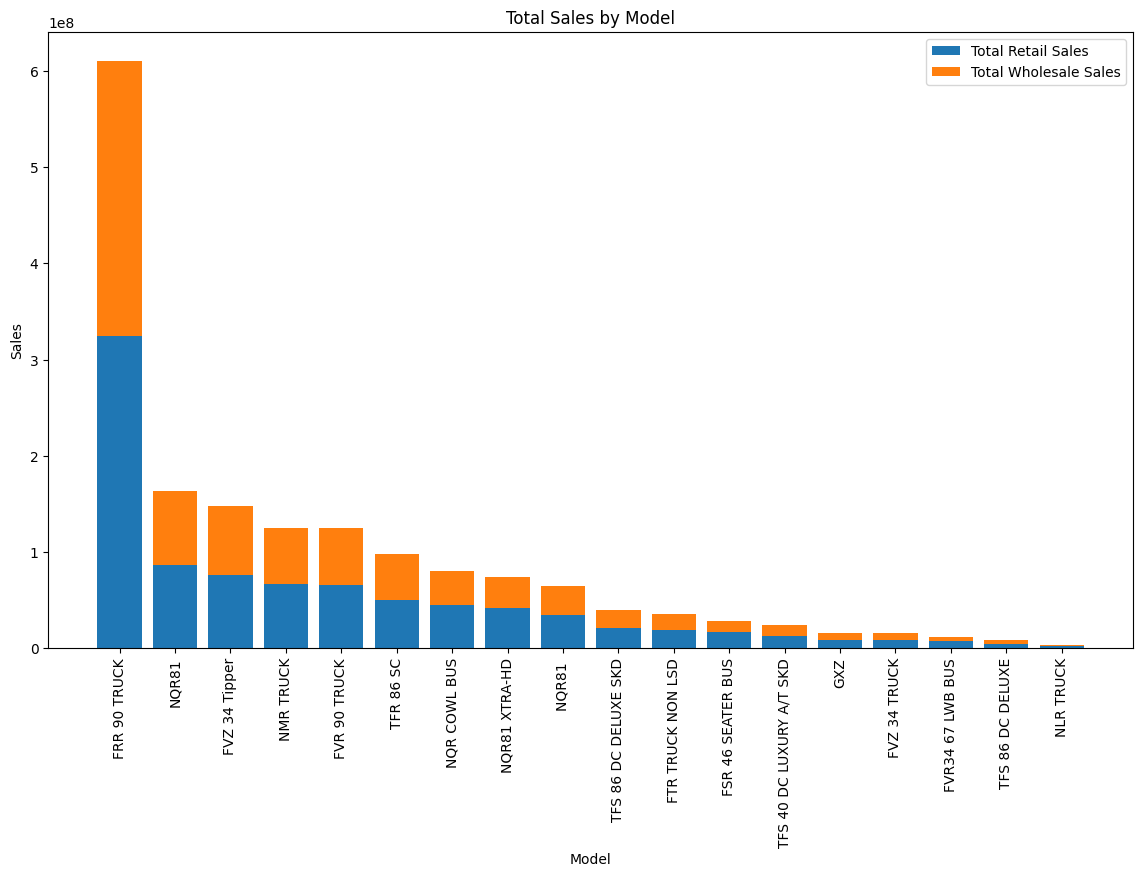

In [ ]:
# importing the mathplotlib.pyplot module
import matplotlib.pyplot as plt
# Aggregate data by 'Model' to calculate total and average sales
model_performance = data.groupby('Model').agg(
    Total_Retail_Sales=pd.NamedAgg(column='Retail', aggfunc='sum'),
    Average_Retail_Sales=pd.NamedAgg(column='Retail', aggfunc='mean'),
    Total_Wholesale_Sales=pd.NamedAgg(column='W/Sale', aggfunc='sum'),
    Average_Wholesale_Sales=pd.NamedAgg(column='W/Sale', aggfunc='mean')
).reset_index()

# Display the aggregated data
print(model_performance)

# Visualization of model performance
plt.figure(figsize=(14, 8))
model_performance.sort_values(by='Total_Retail_Sales', ascending=False, inplace=True)
plt.bar(model_performance['Model'], model_performance['Total_Retail_Sales'], label='Total Retail Sales')
plt.bar(model_performance['Model'], model_performance['Total_Wholesale_Sales'], bottom=model_performance['Total_Retail_Sales'], label='Total Wholesale Sales')
plt.title('Total Sales by Model')
plt.xlabel('Model')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.legend()
plt.show()



***Analysis of Total Sales by Model***

*   The bar chart visually distinguishes between retail (blue) and wholesale (orange) sales for various vehicle models
*  The y-axis represents total sales in currency units, with scientific notation indicating large figures (for example, "1e8" equates to ksh.100,000,000)
*  Each bar represents a model of vehicle, and the height of the bar segments indicates the sales volume.



**Key Observations:**


*  The model FRR 90 TRUCK shows the highest total sales, with retail sales surpassing wholesale by a considerable margin.
* FVR 90 TRUCK and NQR81 models also show significant sales, but with a closer balance between retail and wholesale.
* Several models, such as the NLR TRUCK and GXZ, show lower overall sales volumes in comparison to the top performers.
* In most cases, retail sales contribute more to the total sales than wholesale, which might suggest a strong end-customer demand or better margins in the retail market.

**Insights and Strategic Implications:**

* Top Performers: The leading models, particularly the FRR 90 TRUCK, could be the primary focus for marketing campaigns and sales strategies given their strong performance.

* Retail vs. Wholesale Focus: The dominance of retail sales in contributing to the total suggests a healthy consumer market which the company can continue to capitalize on. Efforts to increase wholesale volumes could also be explored to balance the sales strategy.

* Model-Specific Strategies: For models where wholesale sales are relatively higher, strategies could be tailored to boost retail performance, possibly by understanding and overcoming barriers to consumer purchase.

**Conclusions and Recommendations:**

* Inventory and Production: Align inventory and production priorities with the sales performance of different models, ensuring supply meets demand, especially for the FRR 90 TRUCK.
* Pricing and Promotions: Review pricing strategies and promotional efforts, particularly for models lagging in retail sales, to stimulate growth.
* **Market** Analysis: Conduct further market research to understand the drivers behind the success of top-performing models and apply these learnings to others.




# **2: Monthly Sales Trend Analysis**

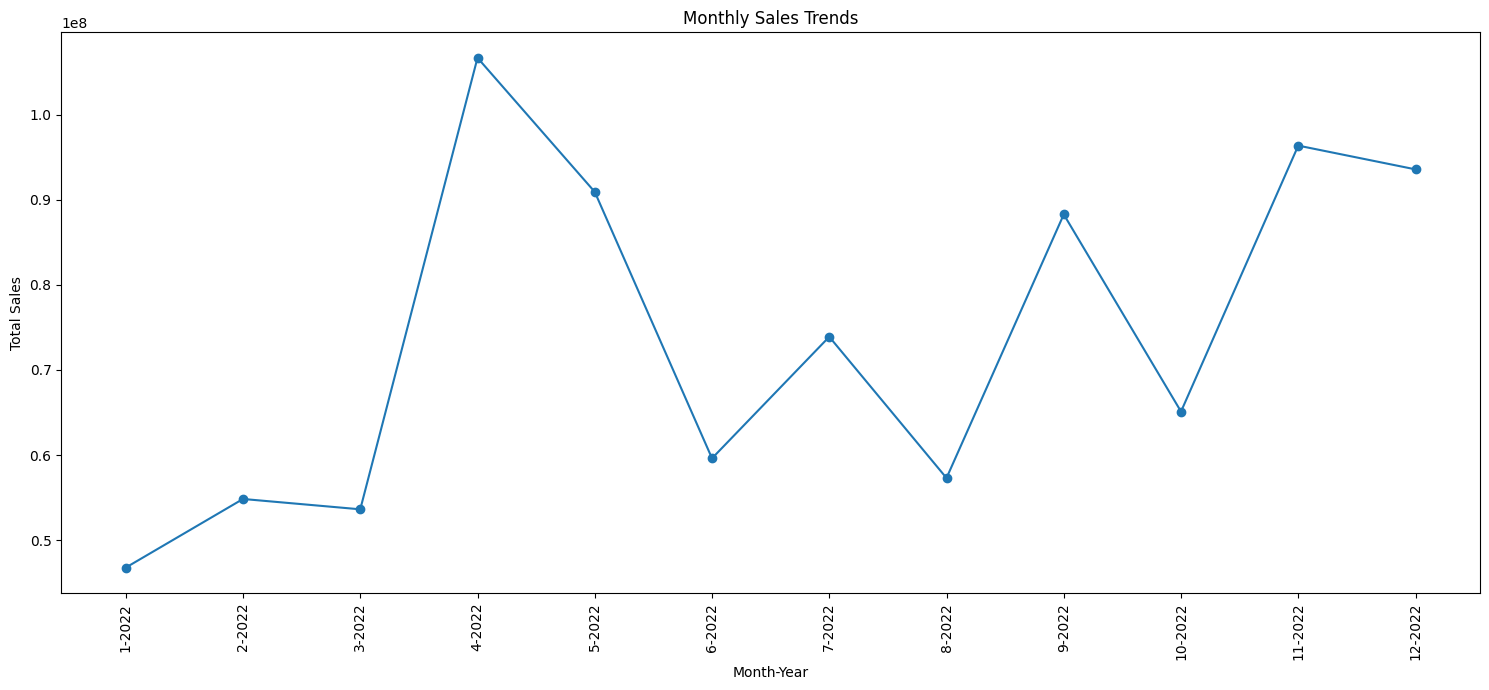

In [ ]:
# Group the data by year and month, then sum the total sales for each month
monthly_trends = data.groupby(['Year', 'Month']).agg(Total_Sales=('Retail', 'sum')).reset_index()

# Sort the data by year and month for proper sequential plotting
monthly_trends.sort_values(by=['Year', 'Month'], inplace=True)

# Plotting the monthly sales trends
plt.figure(figsize=(15, 7))
plt.plot(monthly_trends['Month'].astype(str) + '-' + monthly_trends['Year'].astype(str), monthly_trends['Total_Sales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the x-axis labels
plt.show()

**Monthly Sales Trends Analysis**

The aim of this analysis is to observe the monthly sales trends throughout the year 2022. By visualizing total sales data on a month-by-month basis, we identify periods of high and low sales performance, which may correspond to seasonal market behavior, specific company initiatives, or external economic factors.

**Methodology**

* I aggregated total retail sales for each month, regardless of the product model or branch, to achieve a high-level view of the company's sales performance over time.
* This aggregation made it possible  to pinpoint temporal trends and prepare for anticipated sales cycles in the future.

**The Line-Graph Interpreation**

* The x-axis represents the months of the year 2022, denoted as "Month-Year".
* The y-axis indicates the total sales in a currency format, with values displayed in scientific notation due to their magnitude (e.g., "1e8" represents
1
×
1
0
8
1×10
8
 , or 100 million).
* The line graph shows the trajectory of sales from January 2022 (1-2022) to December 2022 (12-2022).

**Observations**
* Sales Peak in April: There is a notable peak in April, where sales reach their highest point of the year. This suggests a significant increase in consumer demand or successful sales-driving initiatives during this period.
*Sharp Decline in May: Immediately following the peak, there is a sharp decline in May. This could indicate a natural drop after a high-demand period or may highlight an area for investigation, such as stock shortages or marketing strategy shifts.
*Recovery and Stabilization : Sales recover after the May drop, suggesting corrective actions were effective or that the drop was a seasonal or one-off event.
*End-of-Year Growth: There is an upward trend towards the end of the year, possibly related to holiday sales or year-end promotions.

**Insights and Business Implications**
* *Strategic Planning*: The April peak could inform future planning, ensuring stock and resources are allocated efficiently to meet demand.
* *Investigative Actions*: The May decline warrants a deeper look into sales activities, inventory levels, and market conditions to understand the cause and avoid potential future losses for the TMD.
* *Forecasting:* The end-of-year growth trend should be considered when forecasting sales and setting targets for the upcoming year.

**Recommendations**
* *Stock Management*: TMD should ensure  sufficient stock levels in anticipation of peak months like April to capitalize on high-demand periods.
* *Marketing Analysis*: Review marketing and sales strategies during low-performance months like May to identify and rectify any contributing factors.
* *Seasonal Readiness*:The company should prepare for the holiday season well in advance to maximize end-of-year sales opportunities.


# 3: Branch Performance Analysis
Analyzing  the total sales by branch to see which locations are contributing the most to the company's revenue and which may require additional support or investigation.

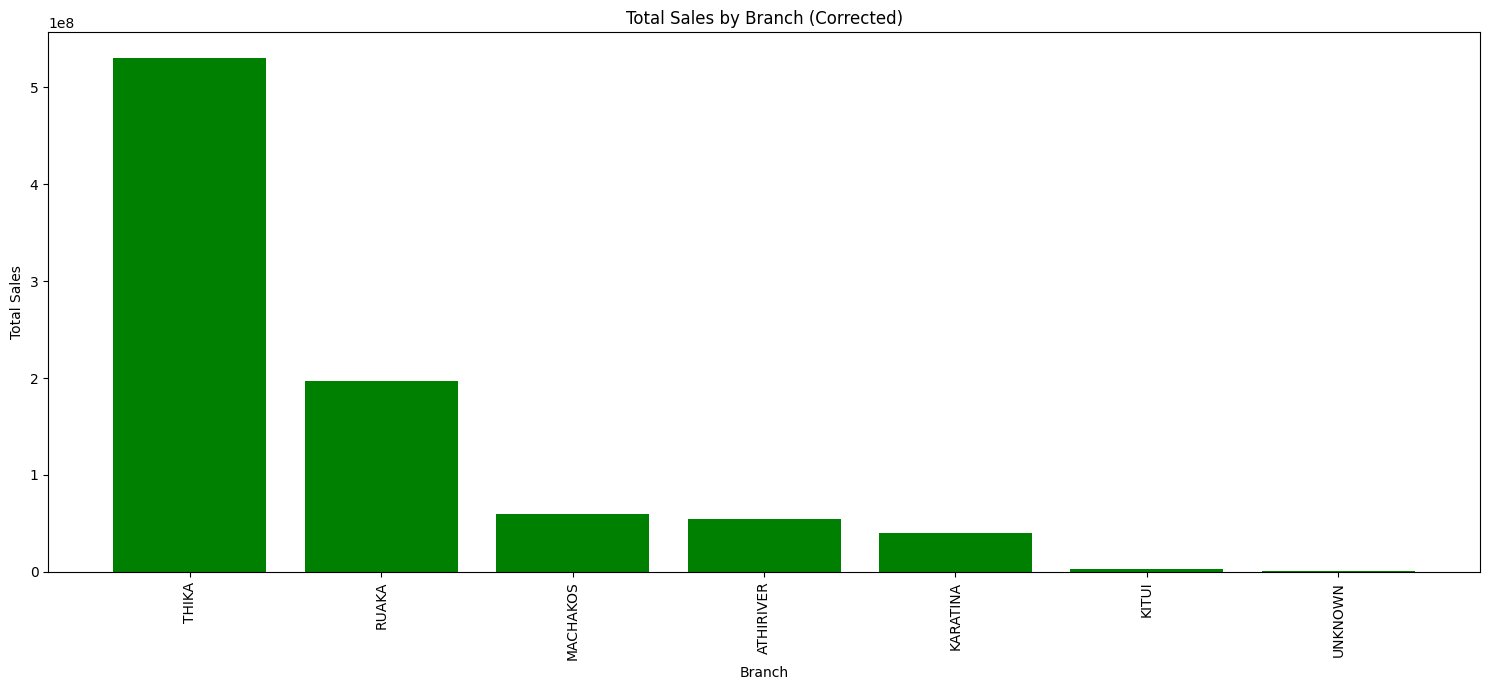

In [ ]:
# Aggregate the sales data by branch
branch_sales = data.groupby('Branch').agg(Total_Sales=('Retail', 'sum')).reset_index()

# Sort the branch_sales DataFrame by Total_Sales in descending order
branch_sales_sorted = branch_sales.sort_values('Total_Sales', ascending=False)

# Re-visualization of branch performance with corrected branch names
plt.figure(figsize=(15, 7))
plt.bar(branch_sales_sorted['Branch'], branch_sales_sorted['Total_Sales'], color='green')
plt.title('Total Sales by Branch (Corrected)')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to fit the x-axis labels
plt.show()



**Branch Performance Analysis**

The Branch Performance Analysis aims to measure and compare the sales effectiveness across various company branches. It identifies which branches contribute most to total sales and which might be underperforming, offering a snapshot of geographical sales distribution.


 * I aggregated the total retail sales for each branch to evaluate their respective contributions to the overall sales figures of the company.

**Bar-Graph Interpretation**

* The x-axis categorizes the branches.
* The y-axis represents the total sales, scaled in scientific notation ( 1e8 equates to 100 million).
* Each bar indicates the total sales for a particular branch, allowing for a direct visual comparison.

**Observations**

* Dominant Branch: The Thika branch shows significantly higher sales compared to others, indicating it is a major revenue generator for the company.
* Secondary Performer: The Ruaka branch stands out as the second-highest in sales, but it is far behind the Thika branch.
* Underperforming Branches: Several branches, such as Athi River, Karatina and Kitui, exhibit relatively low sales figures, suggesting they are either smaller markets or not performing up to the expected standards.
* Unknown Category: There is a category labeled 'Unknown', which indicate sales that could not be attributed to a specific branch, possibly due to ommition, or entry of more than one branch.

**Insights and Strategic Implications**

* *Resource Allocation:* Resources such as marketing budgets, inventory, and staffing could be reallocated to optimize the performance of lower-performing branches.
* *Market Research:* The reasons behind the Thika branch's success could be investigated and potentially replicated in other branches.
* *Data Integrity*: Efforts should be made to reduce the 'Unknown' category by improving data collection and entry processes.

**Recommendations**

* *Targeted Support*: Provide targeted support to branches with lower sales to help improve their performance.
* *Best Practices Analysi*s: Analyze the Thika branch to extract best practices that can be applied to other branches.
* *Enhance Data Collection*: Improve data collection methods to reduce the 'Unknown' sales category, ensuring all sales are correctly attributed to their respective branches.


# 4 : Pricing Strategy Analysis - Average Markup by Model and Branch
Aiming to  understand how the retail and wholesale prices are related to sales volumes. I will  examine if there's a correlation between the price points and the number of units sold, which could provide insights into the elasticity of demand for different models or branches.

**Objective:**

This dual-faceted analysis aims to evaluate the average markup across different models and branches. It provides insights into how pricing varies depending on the product and location, offering a granular view of the company's pricing strategies.

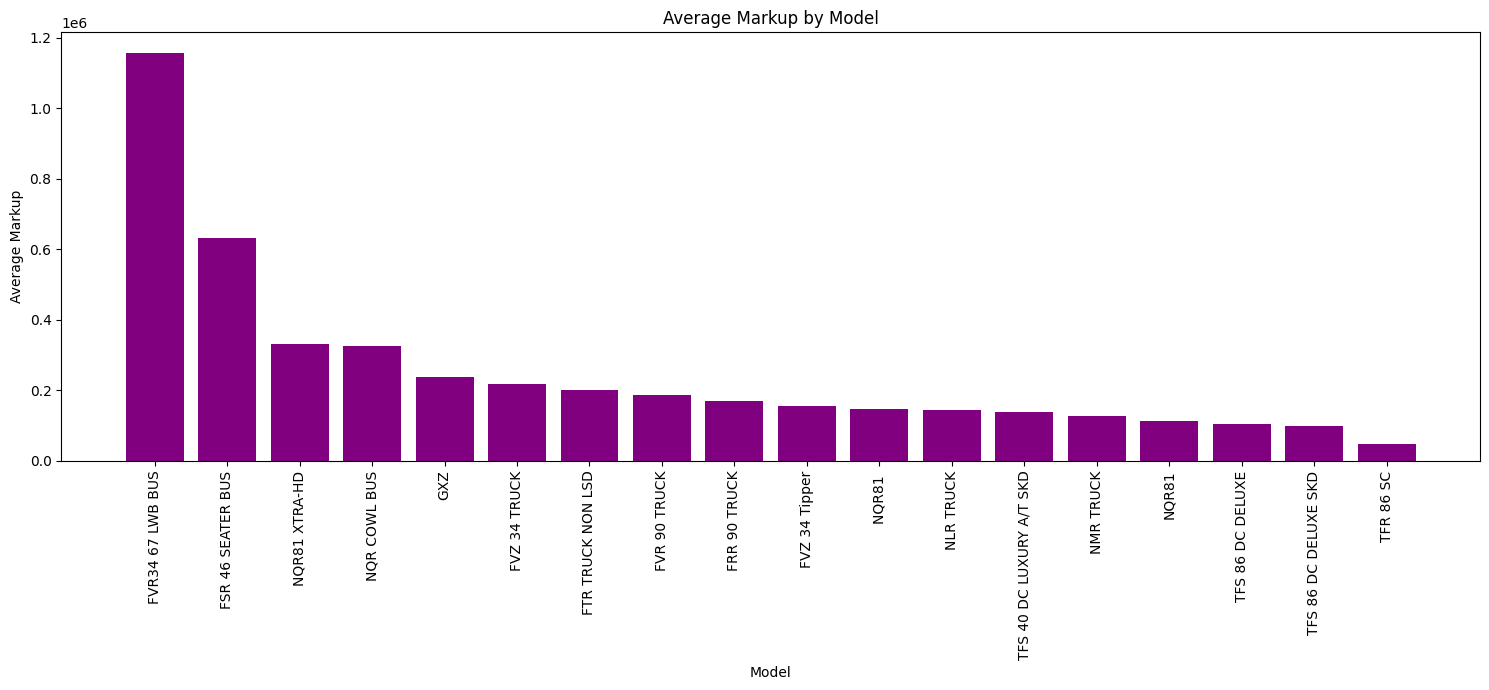

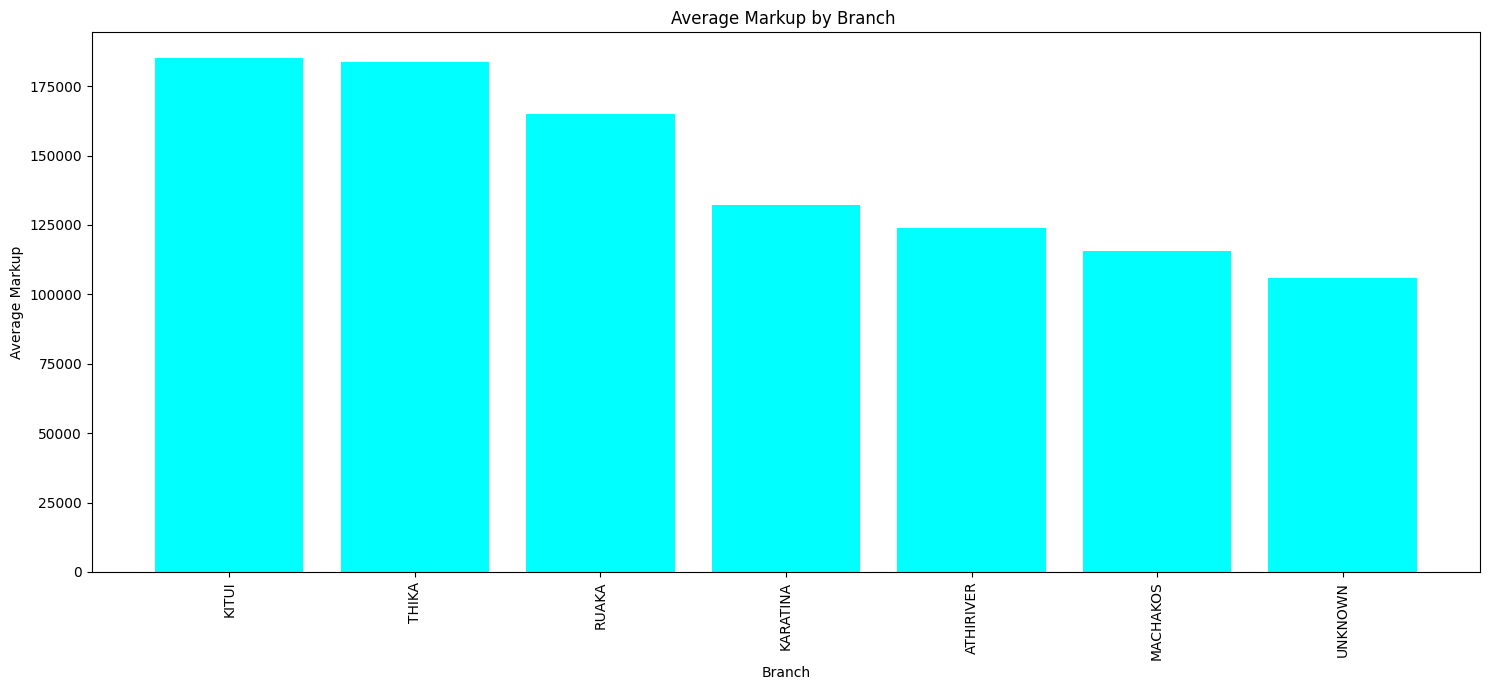

In [ ]:
# calculating  the markup for each sale
data['Markup'] = data['Retail'] - data['W/Sale']

# Aggregate the average markup by model
markup_by_model = data.groupby('Model').agg(Average_Markup=('Markup', 'mean')).reset_index()

# Sort the results for better visualization
markup_by_model_sorted = markup_by_model.sort_values('Average_Markup', ascending=False)

# Visualization of average markup by model
plt.figure(figsize=(15, 7))
plt.bar(markup_by_model_sorted['Model'], markup_by_model_sorted['Average_Markup'], color='purple')
plt.title('Average Markup by Model')
plt.xlabel('Model')
plt.ylabel('Average Markup')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Aggregate the average markup by branch
markup_by_branch = data.groupby('Branch').agg(Average_Markup=('Markup', 'mean')).reset_index()

# Sort and visualize again
markup_by_branch_sorted = markup_by_branch.sort_values('Average_Markup', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(markup_by_branch_sorted['Branch'], markup_by_branch_sorted['Average_Markup'], color='cyan')
plt.title('Average Markup by Branch ')
plt.xlabel('Branch')
plt.ylabel('Average Markup')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**Average Markup Analysis**

Markup was calculated as the difference between the retail and wholesale prices for each transaction. These figures were then averaged for each model and branch to assess the pricing approach and its consistency across the business.

**Average Markup by Model:**
* High Markup Models: The FVR 34 67 LWB BUS model commands the highest average markup, suggesting that it may be positioned as a premium offering.
* Consistency in Markup: The majority of models have a moderate average markup, which may reflect a standardized pricing strategy across these models.

**Average Markup by Branch:**

* Branch Markup Discrepancies: There is a noticeable variation in markup among branches. KITUI and THIKA show the highest markups, indicating potential differences in customer purchasing power or branch-specific strategies.
* Unknown Markup: The 'UNKNOWN' branch markup is considerably lower, which could be due to incomplete data or sales that do not fit into standard pricing categories.

**Insights:**

* *Model Pricing Analysis*: High markups on specific models suggest room for potential price adjustments if those models are not meeting sales volume targets. Conversely, models with lower markups may be positioned competitively to capture market share.
* *Branch Pricing Strategies:* The variation in markup by branch implies that pricing may be adapted to local market conditions. Branches with higher markups could be operating in areas with less price sensitivity, while others may need competitive pricing to maintain sales.

**Recommendations:**
* *Pricing Optimization*: Analyze the elasticity of demand for high markup models and consider adjusting prices to maximize revenue without significantly impacting the volume of sales.
* *Strategic Promotions*: Use strategic promotions to increase the turnover of models with lower markups, improving their contribution to overall profitability.
* *Enhanced Data Integrity*: Address the UNKNOWN category by improving data capture methods, ensuring accurate pricing and sales analysis.
* *Localized Marketing*: Tailor marketing campaigns to emphasize the value provided by branches with high markups and explore opportunities to increase the perceived value of offerings in branches with lower markups.




# 5:  Customer Analysis
Aiming to identify the top customers for TMD  by sales volume to understand their contribution to the company's revenue.

I aggregated the sales data  per customer, and selected the top 10 customers by sales volume for analysis. Then visualized  the  sales contributions  using a pie chart to represent each customer's share of total sales among the top 10.

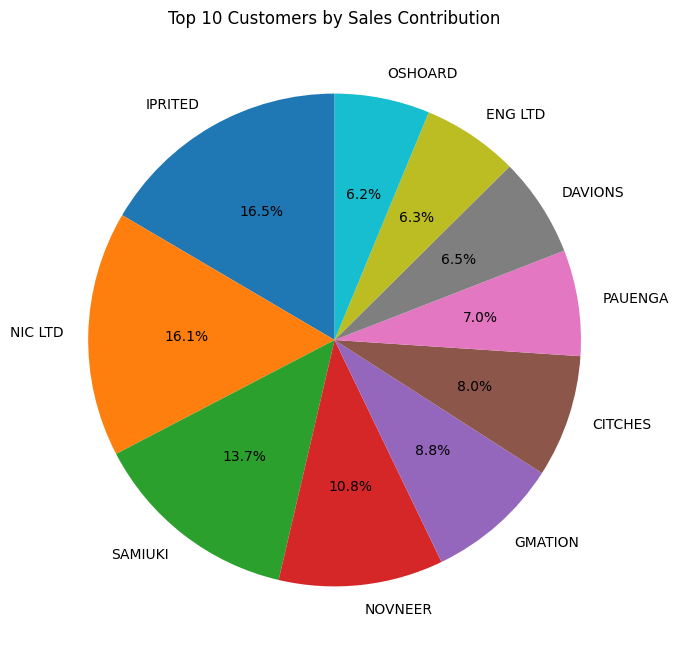

In [ ]:

# Aggregate total sales by customer
customer_sales = data.groupby('Customer Name')['Retail'].sum().sort_values(ascending=False)

# Select top 10 customers for visualization
top_customers = customer_sales.head(10)

# Plotting the pie chart for the top 10 customers
plt.figure(figsize=(10, 8))
top_customers.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Customers by Sales Contribution')
plt.ylabel('')
plt.show()



**Results:**

* Customer Concentration: The pie chart indicates a significant concentration of sales among the top customers. The top two customers, 'NIC LTD' and 'IPRITED', contribute a combined total of approximately 32.6% of the sales volume among the top 10 customers.
* Sales Distribution: The sales are fairly well distributed among the remaining top customers, with each contributing between 6.2% and 13.7% of the sales volume among the top 10.

**Insights:**

* *Customer Dependency*: There's a notable dependency on the top customers, which could represent both an opportunity and a risk. While it is beneficial to have such strong sales contributors, there is also a risk if one of these customers were to decrease their purchases.
* *Diversification Opportunity*: The company might benefit from strategies aimed at broadening its customer base to reduce the risk associated with dependency on a few large customers.

**Recommendations:**

* *Customer Relationship Management (CRM)*: Strengthen relationships with top customers through personalized service and tailored offerings to maintain their loyalty.
* *Expand Customer Base*: Implement marketing strategies aimed at acquiring new customers or increasing sales among smaller customers to reduce dependency on top buyers.
* *Risk Mitigation*: Analyze the sales trends of these top customers to identify any potential risks and develop contingency plans.


# 6: Predictive Modeling: Sales Forecasting

Build a model that uses historical sales data to predict future sales, aiding in inventory and sales strategy planning. Performing a Time series analysis, using an ARIMA model, the forecast will be for the next 12 months.

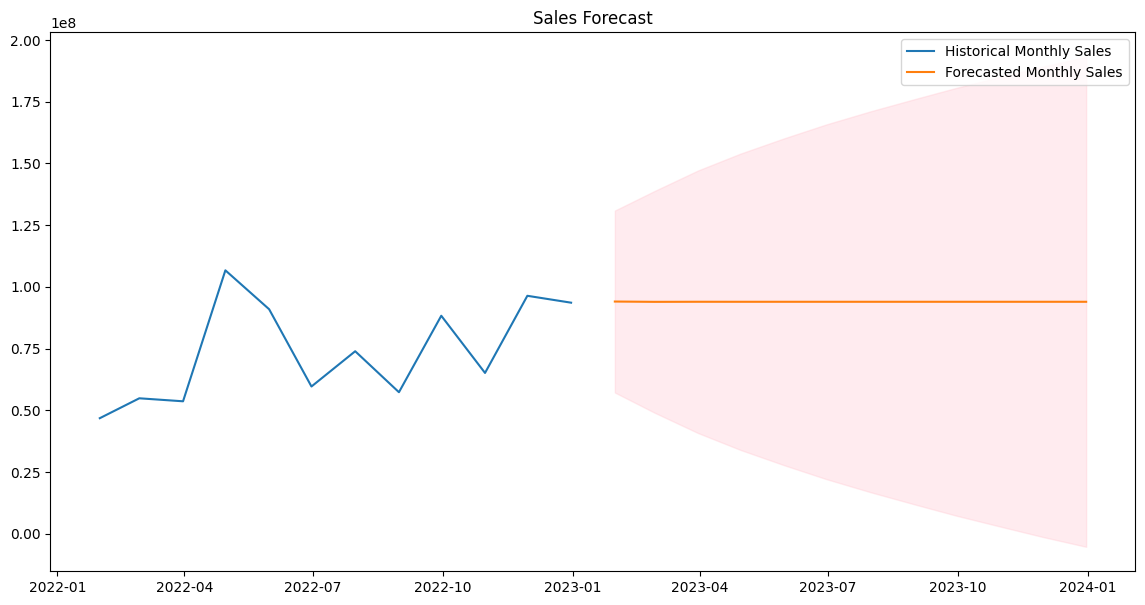

In [ ]:

from statsmodels.tsa.arima.model import ARIMA

# Load data and ensure it's indexed by the date
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data.set_index('Invoice Date', inplace=True)
monthly_sales = data['Retail'].resample('M').sum()

# Define the model
model = ARIMA(monthly_sales, order=(1, 1, 1))  # Adjust the order based on model diagnostics
fitted_model = model.fit()

# Forecast future sales
forecast = fitted_model.get_forecast(steps=12)  # F
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Monthly Sales')
plt.plot(mean_forecast.index, mean_forecast, label='Forecasted Monthly Sales')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Sales Forecast')
plt.show()


The ARIMA (Autoregressive Integrated Moving Average)  model is particularly suited to time series data that shows evidence of non-stationarity, where data show trends and seasonality. An order of (1, 1, 1) was chosen for the model, indicating one autoregressive term, one differencing pass to achieve stationarity, and one moving average term.

**Analysis**

* The time series data of historical monthly sales was first plotted to provide a baseline for comparison against the forecasted data.

* The ARIMA model was then fitted to the historical data, and a 12-month sales forecast was produced.

* The forecasted sales are displayed as a line plot, with the historical sales in blue for reference.

* A confidence interval is included, represented by the shaded pink area, which provides a range within which future sales are expected to fall, with a given level of confidence.
Observations:
* Historical sales show variability from month to month but do not display a clear upward or downward trend over the period provided.

* The forecast suggests that sales are expected to continue in a similar range as the historical data, with the confidence interval widening as time progresses, indicating increasing uncertainty in the forecast.

**Insights:**

* The model does not predict a significant increase or decrease in sales, suggesting stable sales performance in the immediate future.

* The increasing range of the confidence interval over time points to the need for cautious interpretation of the long-term forecast and suggests a potential benefit in frequently updating the forecast as new data becomes available.

**Recommendations:**

* *Regular Model Updates*: The sales forecasting model should be updated regularly with the latest data to improve accuracy and reduce uncertainty.

* *Monitor Key Indicators*: There is need to keep an eye  on market trends and indicators that might affect sales, which are not captured in the historical data alone.

* *Strategic Planning*: The company should use the forecast to make informed decisions about stock levels, staffing, and marketing efforts to optimize sales performance.


# 7 : Correlation Analysis: Investigating Relationships Between Sales Variables
 Identifying  and quantifying  the relationships between various sales-related variables, Which include retail price, wholesale price, markup, and sales volume.
 I will conduct  Correlation analysis using Pearson’s correlation coefficient for continuous variables. This statistical measure ranges from -1 to 1, where 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no correlation.


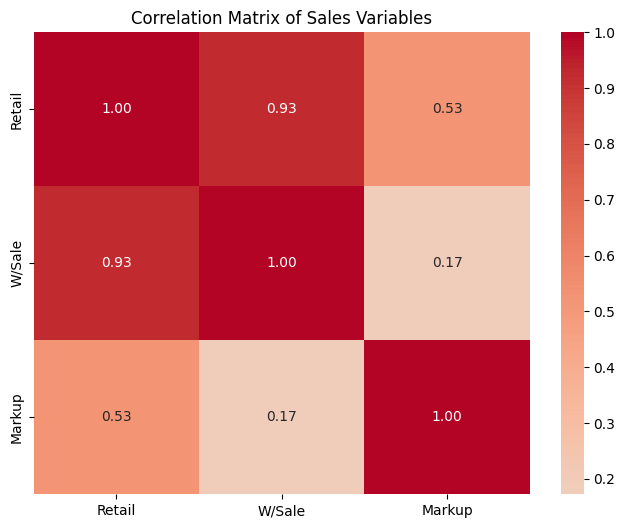

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = cleaned_data[['Retail', 'W/Sale', 'Markup']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

# Show the plot with a title
plt.title('Correlation Matrix of Sales Variables')
plt.show()

**The heatmap visualizes the correlation coefficients as follows:**

* Retail and Wholesale Prices: Display a strong positive correlation of 0.93, indicating that these variables move together in a linear fashion. As the retail prices increase, wholesale prices tend to increase proportionately.
* Retail Price and Markup: Show a moderate positive correlation of 0.53, suggesting that higher retail prices are moderately associated with increased markups.
* Wholesale Price and Markup: Have a weak positive correlation of 0.17, implying that wholesale prices do not strongly predict markup values.

**Interpretation:**

* The strong correlation between retail and wholesale prices indicates a consistent pricing strategy where the markup tends to be stable or proportional across different levels of wholesale prices.
* The moderate correlation between retail prices and markup suggests that, while there is a tendency for higher markups on more expensive items, other factors may also play a significant role in determining the markup.
* The weak correlation between wholesale prices and markup indicates that markups are not primarily driven by wholesale costs alone. This could imply a strategy where markups are adjusted based on other factors such as market demand, competition, or customer willingness to pay.

**Business Implications:**

* Pricing Strategy: The analysis provides a data-driven foundation for making informed decisions about pricing strategies. Understanding these correlations can help in setting retail prices that maximize profitability while remaining competitive.
* Cost Management: The weak correlation between wholesale prices and markup emphasizes the need for effective cost management strategies that do not rely solely on wholesale costs.
* Sales Planning: Knowledge of these financial interrelationships can guide sales and marketing strategies to focus on products and services that offer the best combination of demand and profitability.

**Next Steps:**

* The company should investigate additional factors that might affect markup, such as customer segments, sales channels, or seasonal trends.
* Also a dynamic pricing models should be develop that adjust for various market conditions and customer behaviors.
* Continuously monitor these metrics and their correlations over time to detect any changes in sales dynamics that may warrant adjustments to the pricing strategy.

# Conclusion

This analysis reveals that while certain models like the FRR 90 TRUCK significantly drive sales, a consistent pricing strategy aligns with the overall sales figures, especially when comparing retail and wholesale prices. Seasonal trends are evident, suggesting opportunities for strategic planning around peak sales periods. The reliance on a concentrated group of key customers also highlights the importance of maintaining strong relationships while expanding the customer base to mitigate risks.

To capitalize on these insights, it's imperative For TMD Company to  focus on diversifying the customer base to reduce dependency on major clients, ensure stock availability aligns with predictive sales peaks, and tailor branch-specific strategies based on their performance. Regularly revisiting pricing strategies, customer engagement, and market trends will also ensure the company remains adaptable and competitive. Let's leverage this data-driven foundation to proactively steer our sales strategies towards sustainable growth.